In [1]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import os 
from pathlib import Path
import os 
from pathlib import Path
from tqdm import tqdm
import glob


In [63]:
import os 
from pathlib import Path
path_dir = '../heroes_data/train_dataset/train_mask/'
file_list = os.listdir(path_dir)
file_list



['COCO_train2014_000000362568.png',
 'COCO_train2014_000000222036.png',
 'COCO_train2014_000000581657.png',
 'COCO_train2014_000000413956.png',
 'COCO_train2014_000000150258.png',
 'COCO_train2014_000000318401.png',
 'COCO_train2014_000000460491.png',
 'COCO_train2014_000000456936.png',
 'COCO_train2014_000000216021.png',
 'COCO_train2014_000000570316.png',
 'COCO_train2014_000000026746.png',
 'COCO_train2014_000000336231.png',
 'COCO_train2014_000000165350.png',
 'COCO_train2014_000000373259.png',
 'COCO_train2014_000000047684.png',
 'COCO_train2014_000000065136.png',
 'COCO_train2014_000000033240.png',
 'COCO_train2014_000000307686.png',
 'COCO_train2014_000000479550.png',
 'COCO_train2014_000000248579.png',
 'COCO_train2014_000000300111.png',
 'COCO_train2014_000000561156.png',
 'COCO_train2014_000000135607.png',
 'COCO_train2014_000000523718.png',
 'COCO_train2014_000000495905.png',
 'COCO_train2014_000000219294.png',
 'COCO_train2014_000000379539.png',
 'COCO_train2014_00000002321

In [62]:
# file list 
file_name = []
for file in file_list:
    if file.count(".")==1:
        name = file.split('.')[0]
        file_name.append(name)
    else:
        for k in range(len(file)-1,0,-1):
            if file[k]=='.':
                file_name.append(file[:k])
                break
file_name


['COCO_train2014_000000362568',
 'COCO_train2014_000000222036',
 'COCO_train2014_000000581657',
 'COCO_train2014_000000413956',
 'COCO_train2014_000000150258',
 'COCO_train2014_000000318401',
 'COCO_train2014_000000460491',
 'COCO_train2014_000000456936',
 'COCO_train2014_000000216021',
 'COCO_train2014_000000570316',
 'COCO_train2014_000000026746',
 'COCO_train2014_000000336231',
 'COCO_train2014_000000165350',
 'COCO_train2014_000000373259',
 'COCO_train2014_000000047684',
 'COCO_train2014_000000065136',
 'COCO_train2014_000000033240',
 'COCO_train2014_000000307686',
 'COCO_train2014_000000479550',
 'COCO_train2014_000000248579',
 'COCO_train2014_000000300111',
 'COCO_train2014_000000561156',
 'COCO_train2014_000000135607',
 'COCO_train2014_000000523718',
 'COCO_train2014_000000495905',
 'COCO_train2014_000000219294',
 'COCO_train2014_000000379539',
 'COCO_train2014_000000023218',
 'COCO_train2014_000000053518',
 'COCO_train2014_000000069599',
 'COCO_train2014_000000245683',
 'COCO_t

In [66]:
# folder make
for i in file_name:
    os.mkdir('../heroes_data/train_dataset/train_mask_folder/' + i)

In [69]:
img = cv2.imread ('../heroes_data/train_dataset/train_mask/COCO_train2014_000000000036.png')
img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
np.unique(img)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14], dtype=uint8)

In [70]:
dst = np.where( img != 1 , 0 , img)
dst = np.where( dst == 1, 255, dst)

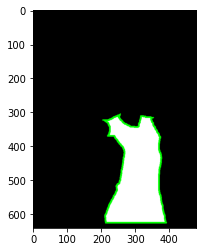

In [75]:
# findCountours()로 mask의 외곽선 좌표 추출. findContours()는 2차원 array로 입력 받을 수 있으므로 3차원 mask를 2차원으로 변환하여 입력.
contours, hierarchy = cv2.findContours(dst[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours = [contour for contour in contours if contour.shape[0] > 2]
contoured_dst = cv2.drawContours(dst, contours, -1, (0, 255, 0), 2, cv2.LINE_8, hierarchy, 100)
plt.imshow(contoured_dst)

In [74]:
print(len(contours))

1


In [2]:
file_dir ='../heroes_data/train_dataset/train_mask/'
file = os.listdir(file_dir)
from tqdm import tqdm

In [5]:
for i in tqdm(file):
    img = cv2.imread(file_dir + i)
    img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
    uni = np.unique(img)
    for n in uni:
        dst = np.where( img != n , 0 , img)
        dst = np.where( dst == n, 255, dst)

        # findCountours()로 mask의 외곽선 좌표 추출. findContours()는 2차원 array로 입력 받을 수 있으므로 3차원 mask를 2차원으로 변환하여 입력.
        contours, hierarchy = cv2.findContours(dst[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #contours = [contour for contour in contours if contour.shape[0] > 2]
        # plt.imshow(contoured_dst)
        # print(len(contours))
        for a in range(len(contours)):
            canvas = np.zeros(img.shape, dtype='uint8')
            contoured_dst = cv2.drawContours(canvas, [contours[a]], -1, (255, 255, 255), -10, cv2.LINE_8, np.array([[hierarchy[0][a]]]), 100)

            name= i.replace(".png" , "")
            
            
            cv2.imwrite( '../heroes_data/train_dataset/train_mask_folder/{}/{}_{}_{}.png'.format(name,name, str(n), a) , contoured_dst)
            
            
    


100%|██████████| 26437/26437 [29:14<00:00, 15.07it/s]


In [ ]:

# img = cv2.imread('../heroes_data/train_dataset/train_mask/COCO_train2014_000000000110.png')

# dst = np.where( img != 1 , 0 , img)
# dst = np.where( dst == 1, 255, dst)

# contours, hierarchy = cv2.findContours(dst[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# #contours = [contour for contour in contours if contour.shape[0] > 2]
# # plt.imshow(contoured_dst)
# # print(len(contours)
# # a=contours[0]
# for a in range(len(contours)):
#     canvas = np.zeros(img.shape, dtype='uint8')
#     contoured_dst = cv2.drawContours(canvas, [contours[a]], -1, (255, 255, 255), -10, cv2.LINE_8, np.array([[hierarchy[0][a]]]), 100)
    
#     cv2.imwrite('../heroes_data/train_dataset/train_mask_folder/COCO_train2014_000000000110/COCO_train2014_000000000110_{}_{}.png'.format(str(1), a), contoured_dst)
#     # plt.imshow(contoured_dst)
#     # plt.show()



In [ ]:
#val_mask - > val_mask_folder 

In [8]:
import os 
from pathlib import Path
path_dir = 'train_dataset/val_mask/'
file_list = os.listdir(path_dir)



In [9]:
# file list 
file_name = []
for file in file_list:
    if file.count(".")==1:
        name = file.split('.')[0]
        file_name.append(name)
    else:
        for k in range(len(file)-1,0,-1):
            if file[k]=='.':
                file_name.append(file[:k])
                break
file_name


['COCO_val2014_000000323496',
 'COCO_val2014_000000183675',
 'COCO_val2014_000000561256',
 'COCO_val2014_000000004134',
 'COCO_val2014_000000353051',
 'COCO_val2014_000000006894',
 'COCO_val2014_000000537991',
 'COCO_val2014_000000320642',
 'COCO_val2014_000000556000',
 'COCO_val2014_000000122046',
 'COCO_val2014_000000039951',
 'COCO_val2014_000000474078',
 'COCO_val2014_000000352684',
 'COCO_val2014_000000459153',
 'COCO_val2014_000000397279',
 'COCO_val2014_000000434548',
 'COCO_val2014_000000349860',
 'COCO_val2014_000000157767',
 'COCO_val2014_000000566923',
 'COCO_val2014_000000369323',
 'COCO_val2014_000000438862',
 'COCO_val2014_000000374369',
 'COCO_val2014_000000423123',
 'COCO_val2014_000000128654',
 'COCO_val2014_000000394206',
 'COCO_val2014_000000044195',
 'COCO_val2014_000000329041',
 'COCO_val2014_000000094944',
 'COCO_val2014_000000101068',
 'COCO_val2014_000000361238',
 'COCO_val2014_000000089648',
 'COCO_val2014_000000204186',
 'COCO_val2014_000000140640',
 'COCO_val

In [10]:
# folder make
for i in file_name:
    os.mkdir('train_dataset/val_mask_folder/' + i)

In [11]:
file_dir ='train_dataset/val_mask/'
file = os.listdir(file_dir)
from tqdm import tqdm

In [12]:
for i in tqdm(file):
    img = cv2.imread(file_dir + i)
    img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
    uni = np.unique(img)
    for n in uni:
        dst = np.where( img != n , 0 , img)
        dst = np.where( dst == n, 255, dst)

        # findCountours()로 mask의 외곽선 좌표 추출. findContours()는 2차원 array로 입력 받을 수 있으므로 3차원 mask를 2차원으로 변환하여 입력.
        contours, hierarchy = cv2.findContours(dst[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #contours = [contour for contour in contours if contour.shape[0] > 2]
        # plt.imshow(contoured_dst)
        # print(len(contours))
        for a in range(len(contours)):
            canvas = np.zeros(img.shape, dtype='uint8')
            contoured_dst = cv2.drawContours(canvas, [contours[a]], -1, (255, 255, 255), -10, cv2.LINE_8, np.array([[hierarchy[0][a]]]), 100)

            name= i.replace(".png" , "")
            
            
            cv2.imwrite( 'train_dataset/val_mask_folder/{}/{}_{}_{}.png'.format(name,name, str(n), a) , contoured_dst)
            
            
    


100%|██████████| 1508/1508 [01:40<00:00, 15.04it/s]


In [ ]:
# 2014train   =   train_mask 
# extraction

In [4]:
file_list ='train_dataset/2014_train/'
file_list = os.listdir(file_list)
# file list 
file_name = []
for file in file_list:
    if file.count(".")==1:
        name = file.split('.')[0]
        file_name.append(name)
    else:
        for k in range(len(file)-1,0,-1):
            if file[k]=='.':
                file_name.append(file[:k])
                break
file_name


['COCO_train2014_000000082511',
 'COCO_train2014_000000238618',
 'COCO_train2014_000000215298',
 'COCO_train2014_000000229002',
 'COCO_train2014_000000123776',
 'COCO_train2014_000000398010',
 'COCO_train2014_000000240407',
 'COCO_train2014_000000571618',
 'COCO_train2014_000000216825',
 'COCO_train2014_000000344597',
 'COCO_train2014_000000298835',
 'COCO_train2014_000000266120',
 'COCO_train2014_000000516985',
 'COCO_train2014_000000043774',
 'COCO_train2014_000000281267',
 'COCO_train2014_000000130705',
 'COCO_train2014_000000480053',
 'COCO_train2014_000000475006',
 'COCO_train2014_000000010321',
 'COCO_train2014_000000573911',
 'COCO_train2014_000000535844',
 'COCO_train2014_000000253710',
 'COCO_train2014_000000211703',
 'COCO_train2014_000000240062',
 'COCO_train2014_000000365624',
 'COCO_train2014_000000029943',
 'COCO_train2014_000000283267',
 'COCO_train2014_000000515287',
 'COCO_train2014_000000313596',
 'COCO_train2014_000000272882',
 'COCO_train2014_000000116832',
 'COCO_t

In [5]:

for i in tqdm(file_name):
    im = Image.open('train_dataset/2014_train/' + i +'.jpg').convert('RGB')
    im.save('train_dataset/2014_train_png/'+i+'.png','png')


100%|██████████| 82783/82783 [3:22:41<00:00,  6.81it/s]


In [2]:
import shutil
list ='train_dataset/2014_train_png/'
list = os.listdir(list)

list2 ='train_dataset/train_mask/'
list2 = os.listdir(list2)

for i in tqdm(list):
    if i in list2:
        shutil.copy('train_dataset/2014_train_png/'+ i ,'train_dataset/2014_train=mask/'+ i  )
        



100%|██████████| 82783/82783 [12:31<00:00, 110.19it/s]


In [29]:
file_list ='train_dataset/2014_minival/'
file_list = os.listdir(file_list)
# file list 
file_name = []
for file in file_list:
    if file.count(".")==1:
        name = file.split('.')[0]
        file_name.append(name)
    else:
        for k in range(len(file)-1,0,-1):
            if file[k]=='.':
                file_name.append(file[:k])
                break



In [ ]:

for i in tqdm(file_name):
    im = Image.open('train_dataset/2014_minival/' + i +'.jpg').convert('RGB')
    im.save('train_dataset/2014_minival_png/'+i+'.png','png')


  4%|█▎                                  | 1488/40504 [03:26<1:22:46,  7.86it/s]

In [ ]:
import shutil
list ='train_dataset/2014_minival_png/'
list = os.listdir(file_list)

list2 ='train_dataset/val_mask/'
list2 = os.listdir(file_list2)

for i in tqdm(list):
    if i in list2:
        shutil.copy('train_dataset/2014_minival_png/'+ i ,'train_dataset/2014_val=mask/'+ i  )
        



In [ ]:
# delete 0_0

In [33]:
import glob
file_0 = glob.glob('train_dataset/train_mask_folder/*/*_0_0.png')
file_0


['train_dataset/train_mask_folder/COCO_train2014_000000489011/COCO_train2014_000000489011_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000461876/COCO_train2014_000000461876_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000433715/COCO_train2014_000000433715_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000174098/COCO_train2014_000000174098_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000292928/COCO_train2014_000000292928_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000190992/COCO_train2014_000000190992_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000038350/COCO_train2014_000000038350_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000117321/COCO_train2014_000000117321_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000580434/COCO_train2014_000000580434_0_0.png',
 'train_dataset/train_mask_folder/COCO_train2014_000000212574/COCO_train2014_000000212574_0_0.png',


In [ ]:
import glob
file_0 = glob.glob('train_dataset/val_mask_folder/*/*_0_0.png')
file_0


In [34]:
path = glob.glob('train_dataset/train_mask_folder/*/*.png')
for i in tqdm(file_0):
    if i in path:
        os.remove(i)

100%|██████████| 26437/26437 [01:57<00:00, 224.79it/s]


In [ ]:
path = glob.glob('train_dataset/val_mask_folder/*/*.png')
for i in tqdm(file_0):
    if i in path:
        os.remove(i)

In [ ]:
#COCO Format
#mask 이미지 파일을 기반으로 segmentation polygon과 bbox정보를 추출

#opencv의 findContours()를 이용하여 외곽선 정보 추출하고, 이를 기반으로 coco segmentation polygon 생성
#segmentation 정보를 기반으로 bbox 정보 생성.

In [33]:
# ravel()은 다차원을 1차원으로 변환. 
a1 = np.array([[1,2],
               [3,4]])
a1.ravel()

array([1, 2, 3, 4])

In [2]:
# bounding box 정보를 polygon에서 추출. 
def get_bbox(segm):
  x_min = float("inf")
  y_min = float("inf")
  x_max = 0
  y_max = 0
  for s in segm:
    #segmentation polygon정보로 bounding box 정보 추출. 
    x, y, w, h = cv2.boundingRect(s)
    x_b = x + w
    y_b = y + h
    # 최소 0보다 크고, 무한대 보다는 좌표값이 작아야 함. 
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x_b)
    y_max = max(y_max, y_b)

  # 좌상단 좌표와, width, height 반환. 
  return x_min, y_min, x_max - x_min, y_max - y_min

In [84]:
import pycocotools.mask as maskUtils

def check_polygons(mask_filepath, polygons, img_h, img_w):
  try:

    rles = maskUtils.frPyObjects(polygons, img_h, img_w)
    rle = maskUtils.merge(rles)
  except Exception as e:
    # print('##### 오류 polygon 발생 #####:',  e,polygons)
    # print('오류 mask file명:', mask_filepath)
    pass

In [85]:
# mask image를 기반으로 segmentation polygon과 bbox 정보를 추출하는 로직 함수화
def get_annotation_info(mask_dir, mask_filename):
  mask_filepath = os.path.join(mask_dir, mask_filename)
  mask_array = cv2.imread(mask_filepath)
  contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  segm = [contour for contour in contours if contour.shape[0] > 2]
  # polygons = [s.ravel().tolist() for s in contours]
  polygons = [s.ravel().tolist() for s in segm]
  check_polygons(mask_filepath, polygons, mask_array.shape[0], mask_array.shape[1])
  xmin, ymin, bwidth, bheight = get_bbox(segm)
  # 만약 polygons가 Null이면 segmentation과 bbox annotation을 None으로 반환. 
  if polygons == []:
    return None, None 
  # polygons가 Null이 아니면 정상적으로 segmentation과 bbox annotation 반환. 
  else: 
    return polygons, [xmin, ymin, bwidth, bheight]

In [73]:
image_ids = [os.path.basename(x) for x in glob.glob('../train_dataset/train_mask_folder/*')]




In [20]:
val_image_ids = [os.path.basename(x) for x in glob.glob('../train_dataset/val_mask_folder/*')]




In [90]:

import cv2
import json

def convert_nucleus_to_coco(data_root_dir, image_ids, out_file , type):
  image_ids = [os.path.basename(x) for x in glob.glob('../train_dataset/{}_mask_folder/*'.format(type))]
  images = []
  annotations = []
  categories = []
  obj_index = 0
  # image 정보를 담아서 images list에 추가.    
  
  for image_id in image_ids:

    # image_id_dir = os.path.join(data_root_dir, image_id)
    image_path = os.path.join('../train_dataset', '2014_{}=mask/'.format(type) + image_id + '.png')
    # image_path = os.path.join('train_dataset', '2014_train=mask/' + image_id + '.png')
    file_name = image_id + '.png'
    
    height, width = cv2.imread(image_path).shape[0:2]  
    # 개별 image의 dict 정보 생성
    image_info = dict(file_name=file_name,
                      height=height,
                      width=width,
                      id=image_id)
    # 개별 image dict 정보를 images list에 추가. 
    images.append(image_info)

    # 개별 image에 있는 여러 mask 이미지 파일을 segmentation, bbox로 변환하여 annotation dict 정보 생성. 

    mask_dir = '../train_dataset/{}_mask_folder/{}'.format(type,image_id)
    # mask_dir = 'train_dataset/train_mask_folder/'+image_id
    mask_filename_list = [os.path.basename(x) for x in glob.glob(mask_dir + '/*.png')]
    
    # 개별 image에 있는 여러 mask 이미지 파일을 기반으로 annotation dict 생성. 
    for mask_filename in mask_filename_list:
        # 개별 mask 파일에서 polygon list와 bbbox list를 계산하여 반환.  
        segmentation, bbox = get_annotation_info(mask_dir, mask_filename)
        
        # 만일 segmentation이 None이면 coco 데이터로 만들지 않음. 
        if segmentation is None:
            continue
        annotation = dict(segmentation=segmentation,
                          area=bbox[2]*bbox[3] , # 반드시 계산 필요.
                          iscrowd=0,
                          bbox=bbox,
                          category_id= int(mask_filename.split("_")[3]),
                          image_id=image_id,
                          id = obj_index)
        # 계산된 annotation dict 정보를 annotations list에 추가. 
        annotations.append(annotation)
        # object 고유 id 증가. 
        obj_index += 1
      # print('image id:', image_id, 'annotation is done')
  
  # images 와 annotations, categories list를 최종 Dict로 변환하고 json 형식으로 출력. 
  coco_format_json = dict(
    images = images,
    annotations = annotations,
    categories = [{'id':1, 'name':'body'},
                      {'id':2, 'name':'right_hand'},
                      {'id':3, 'name':'left_hand'},
                      {'id':4, 'name':'left_foot'},
                      {'id':5, 'name':'right_foot'},
                      {'id':6, 'name':'right_thigh'},
                      {'id':7, 'name':'left_thigh'},
                      {'id':8, 'name':'right_calf'},
                      {'id':9, 'name':'left_calf'},
                      {'id':10, 'name':'left_arm'},
                      {'id':11, 'name':'right_arm'},
                      {'id':12, 'name':'left_forearm'},
                      {'id':13, 'name':'right_forearm'},
                      {'id':14, 'name':'head'}]
    )
  
  # json 파일로 출력. 
  #mmcv.dump(coco_format_json, out_file)
  with open(out_file, 'w') as json_out_file:
    json.dump(coco_format_json, json_out_file)

In [91]:
convert_nucleus_to_coco('/content/nucleus', image_ids, '../train.json' , 'train')

libpng warning: Ignoring iCCP chunk with declared size = 4294967295 and actual length = 33248
libpng warning: Ignoring iCCP chunk with declared size = 3757432833 and actual length = 19492
libpng warning: Ignoring iCCP chunk with declared size = 4294967295 and actual length = 33248
libpng warning: Ignoring iCCP chunk with declared size = 1851388928 and actual length = 1019
libpng warning: Ignoring iCCP chunk with declared size = 1103637493 and actual length = 12158
libpng warning: Ignoring iCCP chunk with declared size = 4294967295 and actual length = 33248
libpng warning: Ignoring iCCP chunk with declared size = 1247582405 and actual length = 43040
libpng warning: Ignoring iCCP chunk with declared size = 3815628978 and actual length = 37378


In [92]:
convert_nucleus_to_coco('/content/nucleus', val_image_ids, '../val.json','val')

libpng warning: Ignoring iCCP chunk with declared size = 4294967295 and actual length = 33248


In [35]:
from pycocotools.coco import COCO

coco_train = COCO('../train_dataset/ai_2014_train=mask.json')

loading annotations into memory...
Done (t=8.28s)
creating index...
index created!


In [36]:
dic = [{'id':1, 'name':'body'},
                      {'id':2, 'name':'right_hand'},
                      {'id':3, 'name':'left_hand'},
                      {'id':4, 'name':'left_foot'},
                      {'id':5, 'name':'right_foot'},
                      {'id':6, 'name':'right_thigh'},
                      {'id':7, 'name':'left_thigh'},
                      {'id':8, 'name':'right_calf'},
                      {'id':9, 'name':'left_calf'},
                      {'id':10, 'name':'left_arm'},
                      {'id':11, 'name':'right_arm'},
                      {'id':12, 'name':'left_forearm'},
                      {'id':13, 'name':'right_forearm'},
                      {'id':14, 'name':'head'}]
a = []
for i in dic:
    a.append(i['name']) 

In [37]:
# category id와 image id 출력. 
catIds = coco_train.getCatIds(catNms=['body'])
print(catIds)
# oco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds =coco_train.getImgIds(catIds=catIds )
print(imgIds)
print(len(imgIds))

[1]
[]
0


In [38]:
# image id에 대한 image 정보와 해당 image의 object별에 annotation 정보 추출. 
img = coco_train.loadImgs(image_ids)[0]
print(img['id'])
annIds = coco_train.getAnnIds(imgIds=[img['id']], catIds=[0], iscrowd=None)
# print(annIds)
anns = coco_train.loadAnns(annIds)
# print(anns)
# print(len(anns))

COCO_train2014_000000489011


In [39]:
import numpy as np

# coco data 실습에 사용된 시각화 함수를 그대로 가져옴. 
def get_polygon_xy(ann_seg):
  polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
  polygon_y = [x for index, x in enumerate(ann_seg) if index % 2 == 1]
  polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
  polygon_xy = np.array(polygon_xy, np.int32)
  return polygon_xy

def get_mask(image_array_shape, polygon_xy):
  mask = np.zeros(image_array_shape)
  masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1)
  
  return masked_polygon

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:, :, c] = np.where(mask == 1,
                              image[:, :, c] *
                              (1 - alpha) + alpha * color[c] * 255,
                              image[:, :, c])
  return image

# ann_seg_list에 있는 object들의 segmentation에 따라 instance segmentation 시각화. 
def draw_segment(image_array, ann_seg_list, color_list, alpha):
  draw_image = image_array.copy()
  mask_array_shape = draw_image.shape[0:2]

  # list형태로 입력된 segmentation 정보들을 각각 시각화
  for index, ann_seg in enumerate(ann_seg_list):
    # polygon 좌표로 변환. 
    polygon_xy = get_polygon_xy(ann_seg)
    # mask 정보 변환
    masked_polygon = get_mask(mask_array_shape, polygon_xy)

    # segmentation color와 외곽선용 color 선택 
    color_object = color_list[np.random.randint(len(color_list))]
    color_contour = color_list[np.random.randint(len(color_list))]
    # masking 적용. 
    masked_image = apply_mask(draw_image, masked_polygon, color_object, alpha=0.6)
    # 외곽선 적용. 
    s_mask_int = (masked_polygon*255).astype("uint8")
    contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    masked_image = cv2.drawContours(masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

  return masked_image

In [40]:

color_list = [
              (0, 255, 0),masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)

              (255, 0, 0),
              (0, 0, 255)
]
anns = coco_train.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in anns]
# print(ann_seg_list)
# print(len(ann_seg_list))

In [42]:
image =[]
for image_id in image_ids:
    image.append('../train_dataset/2014_train=mask/' + image_id + '.png')

In [44]:
import matplotlib.pyplot as plt
import cv2

# # 원본 이미지 시각화 
# image_id = val_df['image_id'].iloc[0]
# print(val_image_id)

annIds = coco_train.getAnnIds(imgIds=image_ids, catIds=[0], iscrowd=None)
anns = coco_train.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in tqdm(anns)]

# val_image_name = val_df[val_df['image_id']==val_image_id]['image_name'].to_list()
val_image_name = image
image_array = cv2.cvtColor(cv2.imread('../train_dataset/2014_train=mask/COCO_train2014_000000489011.png'), cv2.COLOR_BGR2RGB)

# coco segmentation 정보를 기반으로 segmentation 적용한 이미지 시각화 
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)

plt.figure(figsize=(6, 6))
plt.imshow(masked_image)
plt.axis('off')

100%|██████████| 400703/400703 [00:00<00:00, 3343699.04it/s]


(-0.5, 426.5, 639.5, -0.5)

In [50]:
# plt.figure(figsize=(6, 6))
plt.imshow(masked_image)
plt.show()
# plt.axis('off')

/tmp/ipykernel_5197/1349628601.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [52]:
masked_image.save('ai.png')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [53]:
im = Image.fromarray(masked_image)
im.save('ai.png')